# Task 1: Object recognition

The clustering techniques are frequently used to identify 'points of interest' in an unknown image. This is an unsupervised sub-problem of the generic object recognition task. 

The coins dataset is scikit-learn toy dataset. It includes a single picture that displays 24 Greek coins from Pompeii


In [6]:
#Import Libraries

from skimage import data
from skimage import img_as_float
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
#Insert Data

image = data.coins()
print(image.shape)

(303, 384)


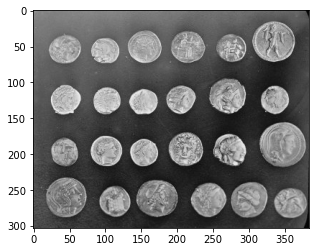

In [11]:
plt.imshow(image, cmap = 'gray');

In [12]:
# Transform Data to an 1D array

vectorized = image.reshape((-1,1))
vectorized = np.float32(vectorized)
print(vectorized.shape)

(116352, 1)


## 1st Way using Scikit Learn

In [13]:
#Train Model

model = KMeans(n_clusters=2)

model.fit(vectorized)
print(model.cluster_centers_)

[[154.64429]
 [ 60.25218]]


In [14]:
# Get labels for all points


values = model.cluster_centers_.squeeze()
data_labels = model.predict(vectorized)
print(values)
print(data_labels)

[154.64429  60.25218]
[1 0 0 ... 1 1 1]


In [15]:
# Recreate the array

image_clust = np.choose(data_labels, values)
image_clust.shape = image.shape

In [16]:
vmin = image_clust.min()
vmax = image_clust.max()

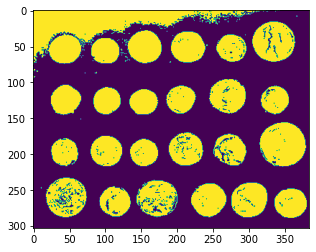

In [17]:
#Show the new image with 2 clusters
plt.imshow(image_clust, vmin=vmin, vmax=vmax);

## 2nd Way using Open CV

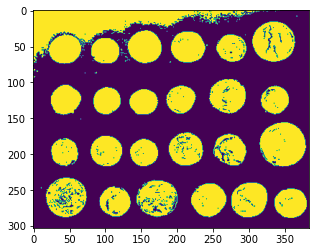

In [18]:
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 2
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image);